# Packing

In [262]:
import matplotlib.pyplot as plt
import math
from random import random

Some helper methods to create circles and draw them

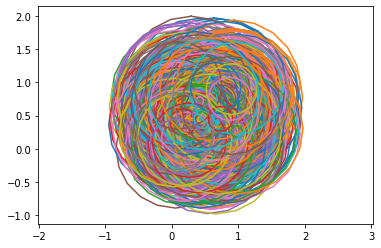

In [263]:
def radiants():
    x = 0.0
    while(x <= math.pi*2):
        yield x
        x += math.pi / 10


def distance(circle1, circle2):
    return math.sqrt(math.pow(circle2.xpos-circle1.xpos, 2) + math.pow(circle2.ypos-circle1.ypos, 2))


class Circle:

    def __init__(self, xpos, ypos, radius):
        self.xpos = xpos
        self.ypos = ypos
        self.radius = radius

    def gencircle(self):
        xl, yl = [], []
        for r in radiants():
            x = self.xpos + (math.sin(r) * self.radius)
            y = self.ypos + (math.cos(r) * self.radius)
            xl.append(x)
            yl.append(y)
        return xl, yl

    def __str__(self):
        return f'x:{self.xpos},y:{self.ypos},r:{self.radius}'


def drawcircles(circles):
    for circle in circles:
        plt.plot(*circle.gencircle())
    plt.axis('equal')
    plt.show()


drawcircles([Circle(random(), random(), random()) for _ in range(0, 1000)])


## Simple packing
Just checking the distance to the all other circles.

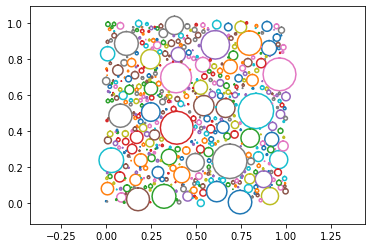

In [264]:
circles = []

for _ in range(0, 10000):
    new = Circle(random(), random(), random()/10)
    add = True
    for circle in circles:
        dist = distance(circle, new)
        if dist < (new.radius + circle.radius):
            add = False
            break
    if add:
        circles.append(new)

drawcircles(circles)


## Simple Packing without border overlapping
Just checking the distance to the other circles and check the distance to the borders.

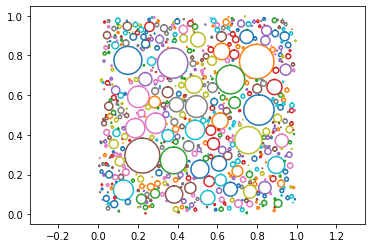

In [265]:
circles = []


def fits(circle):
    diameter = circle.radius * 2
    return (circle.xpos - diameter > 0.0) and (circle.ypos - diameter > 0.0) and \
           (circle.xpos + diameter < 1.0) and (circle.ypos + diameter < 1.0)


for _ in range(0, 10000):
    new = Circle(random(), random(), random()/10)
    if fits(new):
        add = True
        for circle in circles:
            dist = distance(circle, new)
            if dist < (new.radius + circle.radius):
                add = False
                break
        if add:
            circles.append(new)

drawcircles(circles)


## Packing with decreasing size of circle until it doesn't overlaps
Leads to a nice set of packed circles with a chaotic border

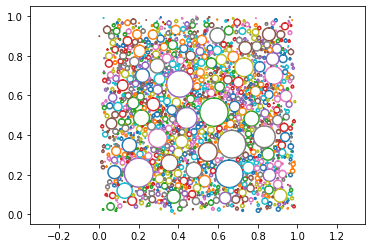

In [266]:
circles = []

for _ in range(0, 10000):
    new = Circle(random(), random(), random()/10)
    if fits(new):
        for circle in circles:
            while(distance(circle, new) < (new.radius + circle.radius)):
                new.radius -= 0.01
        if new.radius > 0.0:
            circles.append(new)

drawcircles(circles)


# Packing with increasing size of circle until it overlaps
This leads to more dense patterns.

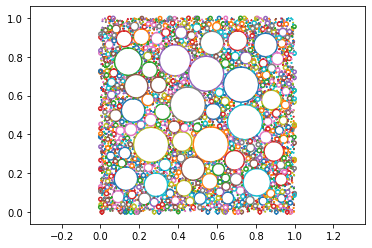

In [269]:
MAXRADIUS = 0.1
STARTRADIUS = 0.001
INCREASE = 0.01

circles = []


def overlaps(circle, list):
    overlap = False
    for c in list:
        if circle != c and distance(circle, c) < (circle.radius + c.radius):
            overlap = True
            break
    return overlap


for _ in range(0, 10000):
    new = Circle(random(), random(), STARTRADIUS)
    if not overlaps(new, circles):
        max = random()
        while(not overlaps(new, circles) and new.radius < MAXRADIUS and fits(new)):
            new.radius += INCREASE
        new.radius -= INCREASE
        circles.append(new)

drawcircles(circles)


## Packing with increasing chuncks of circles
This leads to more bigger circles (in most of the cases) and a dense pattern. 

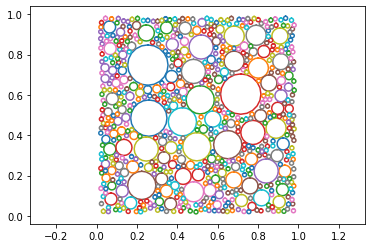

In [268]:
MAXRADIUS = 0.1
STARTRADIUS = 0.01
INCREASE = 0.01
CHUNCKSIZE = 5

circles = []
chunck = []

for _ in range(0, 10000):
    for _ in range(0, CHUNCKSIZE):
        new = Circle(random(), random(), STARTRADIUS)
        if fits(new) and not overlaps(new, chunck) and not overlaps(new, circles):
            chunck.append(new)

    while(True):
        changed = False
        for c in chunck:
            c.radius += INCREASE
            if fits(c) and not overlaps(c, chunck) and not overlaps(c, circles) and c.radius < MAXRADIUS:
                changed = True
            else:
                c.radius -= INCREASE
        if not changed:
            break

    circles += chunck
    chunck = []

drawcircles(circles)
